In [2]:
import caffe
import time
import numpy as np
import sys
import os
import random
%matplotlib inline 
import matplotlib.pyplot as plt
import math

#caffe.set_mode_gpu()
#caffe.set_device(1)
caffe.set_mode_cpu()

/home/sharpy/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


in 3.81135296822 s


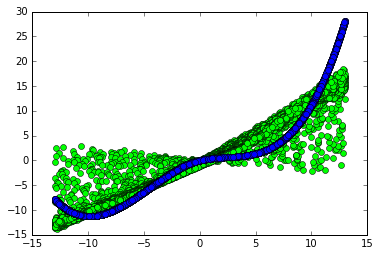

In [17]:
start = time.time()

solver 			= caffe.get_solver("/home/sharpy/local-net/jupyter/tests/2max/2max-func-solver.prototxt")

x_c, y_c = [], []
x2, y2 = [], []
for i in xrange(1,10000):
    x = random.uniform(-13, 13)
    #print rnd
    solver.net.blobs['in' ].data[ 0 ] = x
    #rnd-=2
    #solver.net.blobs['out'].data[ 0 ] = max(0, math.sqrt(rnd*rnd))
    #solver.net.blobs['out'].data[ 0 ] = math.sqrt(rnd*rnd)
    #solver.net.blobs['out'].data[ 0 ] = max(3, math.sqrt(rnd*rnd))
    solver.net.blobs['out'].data[ 0 ] = 0.01*( 0.2*x*(2 + x*x) - 10*x*(x-5)+x*2 + abs(x*x*(x+2)*2) -x*x*10 )
    x_c.extend( solver.net.blobs['in' ].data[ 0 ] )
    y_c.extend( solver.net.blobs['out'].data[ 0 ] )
    #print x[-1]
    solver.step(1)
    x2.extend( solver.net.blobs['in' ].data[ 0 ] )
    y2.extend( solver.net.blobs['predicted_out'].data[ 0 ] )

plt.figure(1)
plt.plot(x2, y2, linestyle='none', marker='o', color='#00FF00' )
plt.plot(x_c, y_c, linestyle='none', marker='o', color='blue' )


end = time.time()
print  'in ' + str((end - start)) + ' s'

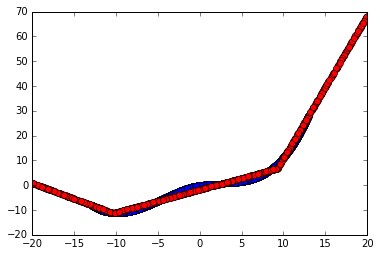

In [22]:
x1, y1 = [], []
#slices = "ABCDE"

y_maxout = {}
#for letter in slices:
#    y_maxout[letter] = []

testnet = solver.test_nets[0]

for i in xrange(1,1000):
    rnd = random.uniform(-20, 20)
    #print rnd
    testnet.blobs['in' ].data[ 0 ] = rnd
    testnet.forward()
    x1.extend( testnet.blobs['in' ].data[ 0 ] )
    y1.extend( testnet.blobs['predicted_out'].data[ 0 ] )
#    for letter in slices:
        #y_maxout[letter].extend( [ solver.net.blobs['slice5'+letter].data[ 0 ][0] ] )
#        y_maxout[letter].extend( [ solver.net.blobs['slice5'+letter].data[ 0 ][0]
#                                  * solver.net.params['predicted_out'][0].data[0]
#                                  + solver.net.params['predicted_out'][1].data[0]  ]  )
        #y1_1.extend( solver.net.blobs['slice5A'].data[ 0 ] )
        #y1_2.extend( solver.net.blobs['slice5A'].data[ 0 ] )
    #print x[-1]
    
plt.figure(1)
#for letter in slices:
#    r = lambda: random.randint(0,255)
    #print('#%02X%02X%02X' % (r(),r(),r()))
#    plt.plot(x1, y_maxout[letter], linestyle='none', marker='o', color='#'+letter+letter
#             +letter+letter+'00' )
plt.plot(x_c, y_c, linestyle='none', marker='o', color='blue' )
plt.plot(x1, y1, linestyle='none', marker='o', color='red' )


#y_maxout = {}
#for letter in slices:
    #y_maxout.append([])
#    y_maxout[letter] = [solver.net.blobs['slice5'+letter].data[ 0 ][0]]
    #print key
#print y_maxout

In [21]:
caffe.set_mode_cpu()
start = time.time()

for i in xrange(1,100000000):
    x = random.uniform(-14, 14)
    solver.net.blobs['in' ].data[ 0 ] = x
    solver.net.blobs['out'].data[ 0 ] = 0.01*( 0.2*x*(2 + x*x) - 10*x*(x-5)+x*2 + abs(x*x*(x+2)*2) -x*x*10 )
    solver.step(1)
    
end = time.time()
print  'in ' + str((end - start)) + ' s'

in 13332.131063 s


In [68]:
print( solver.net.blobs['in'].data[0][0], solver.net.blobs['predicted_out'].data[0][0] )

for layer_name, blob in solver.net.blobs.iteritems():
    print layer_name + '\t' + str(blob.data.shape)
    try:
        print solver.net.params[ layer_name ][0].data
        print '  Bias:'
        print '  ', solver.net.params[ layer_name ][1].data
        print '  Data:'
        print '  ', solver.net.blobs[ layer_name ].data[0]
    except:
        pass
    print ''

(-9.2779093, -9.5170078)
out	(1, 1)

in	(1, 1)

in_to_maxout	(1, 9)
[[-2.05955505]
 [-5.28548193]
 [-2.44655704]
 [ 1.47107506]
 [-5.29102755]
 [ 1.52968037]
 [-0.02024648]
 [-5.39608765]
 [-0.17387246]]
  Bias:
   [ 0.76070213 -1.0257622  -2.37757826  0.00883274 -0.95675969 -0.14202954
 -0.07245143  0.91119498 -0.49962977]
  Data:
   [ 19.86906624  48.01246262  20.32135582 -13.63966846  48.13291168
 -14.33426571   0.11539361  50.97560501   1.11354315]

slice5A	(1, 3)

slice5B	(1, 3)

slice5C	(1, 3)

maxout1	(1, 3)

reversed_maxout1	(1, 3)

slice_rev_A	(1, 1)

slice_rev_B	(1, 1)

slice_rev_C	(1, 1)

minout	(1, 1)

predicted_out	(1, 1)
[[ 0.30519938]]
  Bias:
   [ 11.80698776]
  Data:
   [-9.51700783]

loss	()



In [24]:
help(solver)

Help on NesterovSolver in module caffe._caffe object:

class NesterovSolver(Solver)
 |  Method resolution order:
 |      NesterovSolver
 |      Solver
 |      Boost.Python.instance
 |      __builtin__.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__( (object)arg1, (str)arg2) -> None :
 |      
 |          C++ signature :
 |              void __init__(_object*,std::string)
 |  
 |  __reduce__ = <unnamed Boost.Python function>(...)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __instance_size__ = 32
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from Solver:
 |  
 |  restore(...)
 |      restore( (Solver)arg1, (str)arg2) -> None :
 |      
 |          C++ signature :
 |              void restore(caffe::Solver<float> {lvalue},char const*)
 |  
 |  snapshot(...)
 |      snapshot( (Solver)arg1) -> None :
 |      
 |       

In [25]:
?solver

{'loss': array(0.9780272841453552, dtype=float32)}